Program: AutoArima.ipynb

Author: Sanjeev Naguleswaran

Date: May 2021

This is an implementation of auto Arima in both Python and R with an output of the error metrics.

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error

In [4]:
#load the data

# https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
uploaded = files.upload()


import io
data = pd.read_csv(io.BytesIO(uploaded['AirPassengers.csv']), encoding='UTF-8', index_col='Month', parse_dates=True)

data.index.freq = 'MS'

Saving AirPassengers.csv to AirPassengers.csv


NameError: ignored

Preprocessing

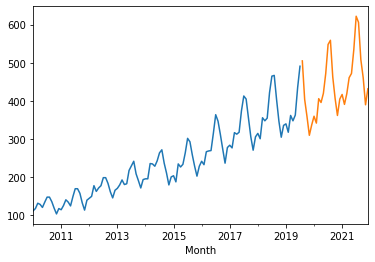

In [12]:
#divide into train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]


#plotting the data
train['#Passengers'].plot()
valid['#Passengers'].plot()

# Build Model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1076.519, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1069.440, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1064.624, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1076.271, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1058.834, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1061.078, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1066.203, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1058.246, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1063.646, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1068.536, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1058.648, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1057.3

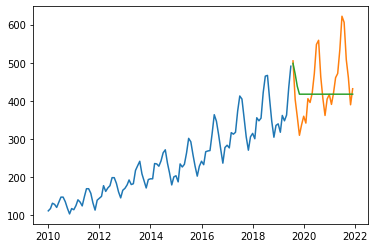

RMSE = 81.2253218619122
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -520.035
Date:                Wed, 12 May 2021   AIC                           1050.070
Time:                        23:30:33   BIC                           1063.751
Sample:                             0   HQIC                          1055.623
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3285      0.077      4.260      0.000       0.177       0.480
ma.L2         -0.2514      0.125     -2.013      0.044      -0.496      -0.007
ma.L3         -0.1427      0

In [86]:
#building the model

model = auto_arima(train['#Passengers'], trace=True, error_action='ignore', suppress_warnings=True)
model_fit=model.fit(train['#Passengers'])

forecast = model.predict(n_periods=len(valid['#Passengers']))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set

plt.plot(train['#Passengers'], label='Train')
plt.plot(valid['#Passengers'], label='Valid')
plt.plot(forecast['Prediction'], label='Prediction')
plt.show()

#calculate rmse


rms = sqrt(mean_squared_error(valid,forecast))
print('RMSE =',rms)

print(model_fit.summary())

This model does not seem to be very accurate. Therefore, build a seasonal model.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=756.629, Time=0.29 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.23 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=756.771, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=757.976, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.09 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 1.253 seconds


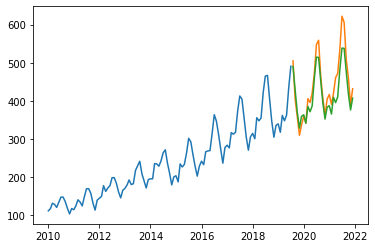

RMSE= 35.08281308682801
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -520.035
Date:                Wed, 12 May 2021   AIC                           1050.070
Time:                        23:27:29   BIC                           1063.751
Sample:                             0   HQIC                          1055.623
                                - 115                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3285      0.077      4.260      0.000       0.177       0.480
ma.L2         -0.2514      0.125     -2.013      0.044      -0.496      -0.007
ma.L3         -0.1427      0

In [81]:
#Seasonal Model
smodel = auto_arima(train['#Passengers'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

smodel.fit(train['#Passengers'])

forecast = smodel.predict(n_periods=len(valid['#Passengers']))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set

plt.plot(train['#Passengers'], label='Train')
plt.plot(valid['#Passengers'], label='Valid')
plt.plot(forecast['Prediction'], label='Prediction')
plt.show()

#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print('RMSE=', rms)
print(model_fit.summary())

**Accuracy Metrics**

---


The commonly used accuracy metrics to judge forecasts are:

Mean Absolute Percentage Error (MAPE)
Mean Error (ME)
Mean Absolute Error (MAE)
Mean Percentage Error (MPE)
Root Mean Squared Error (RMSE)
Lag 1 Autocorrelation of Error (ACF1)
Correlation between the Actual and the Forecast (corr)
Min-Max Error (minmax)

Typically, if you are comparing forecasts of two different series, the MAPE, Correlation and Min-Max Error can be used.
Because only the above three are percentage errors that vary between 0 and 1. That way, you can judge how good is the forecast irrespective of the scale of the series.

The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.

e.g. Around 2% MAPE implies the model is about 98% accurate in predicting the next 15 observations.

In [ ]:
# Accuracy metrics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


forecast_accuracy(forecast.iloc[:,0],valid['#Passengers'])

#R Implementation

In [2]:
load_ext rpy2.ipython

In [ ]:
%%R
install.packages("forecast")
install.packages("Metrics")
install.packages("tseries")

Series: train_ts 
ARIMA(1,1,0)(1,1,0)[12] 

Coefficients:
          ar1     sar1
      -0.2434  -0.2127
s.e.   0.1046   0.1072

sigma^2 estimated as 91.28:  log likelihood=-319.1
AIC=644.2   AICc=644.49   BIC=651.6

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.5045078 8.808635 6.330231 0.1513662 2.828787 0.2157476
                    ACF1
Training set 0.003930745


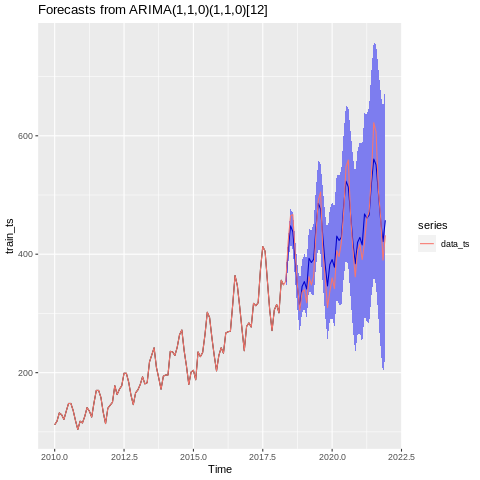

In [21]:
%%R
# loading packages
library(forecast)
library(Metrics)

# reading data (this needs to be loaded into colab via Python)
data <- read.csv("/content/AirPassengers.csv")

#You can use this in model to just get the parameters 
data_ts= ts(data[-1],start=2010,frequency=12) 

# splitting data into train and valid sets (we could also use subset)
train <- data[1:100,]
valid <- data[101:nrow(data),]

nrow(train);nrow(valid)

train_ts<-ts(train[-1], start=2010, frequency=12)


# training model
model <- auto.arima(train_ts,D=1)

# model summary
summary(model)

forecastR<-forecast(model,level=c(95), h=nrow(valid))
autoplot(forecastR) +autolayer(data_ts)

In [ ]:

forecastR